# 데이터 전처리 및 특성공학에 유용한 사이킷런 모듈

In [38]:
# 명령 결과 모두 보기
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

# 버전 경고 무시
import warnings
warnings.filterwarnings('ignore')

# 판다스와 넘피
import pandas as pd
import numpy as np

# 그림 그리기
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
get_ipython().run_line_magic('matplotlib', 'inline')
plt.rcParams['font.family']='Malgun Gothic' # 한글폰트

from IPython.display import Image
width=700; height=500

https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html#sphx-glr-auto-examples-model-selection-plot-cv-indices-py

In [39]:
def summary(df) :
    tf = pd.DataFrame({'데이터형태(dtypes)' : df.dtypes,
                       '비 결측치 수(notnull': df.notnull().sum(),
                       '결측치 수(null)' : df.isnull().sum(),
                       '고유값 수(nunique)' : df.nunique()})
    return tf

https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation-iterators
    
### Visualizing cross-validation behavior in scikit-learn
https://scikit-learn.org/stable/auto_examples/model_selection/plot_cv_indices.html

# <font color='purple'> What is Cross Validation?
Validation of the model to identify / evaluate if it fits the data accurately whilst also ensuring that it does not overfit.
### what is Overfit?
    * Model fits perfectly on train data but does not generalize / performs poorly on the test data.

In [40]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
X[0:2]
y[0:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00]])

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### 1. K-Fold Cross Validation

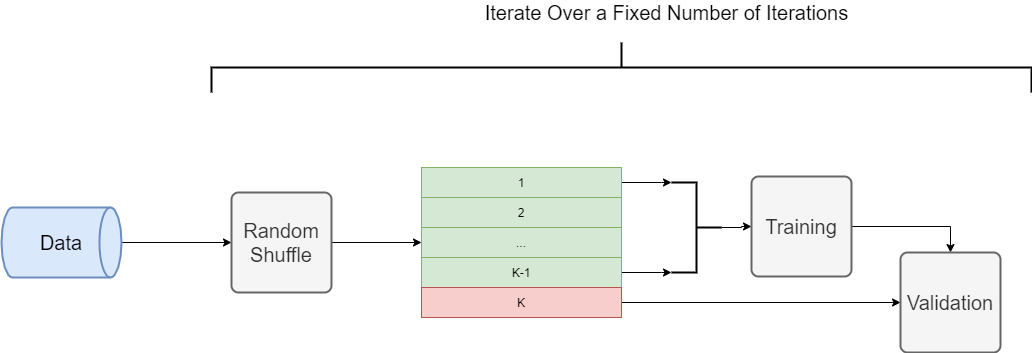

In [41]:
Image(filename='../image/cv/k-fold cv.png', width=width, height=height)

In [42]:
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
sgd=SGDRegressor()

In [43]:
kf=KFold(n_splits=10, shuffle=True, random_state=None)

logs=[]

for train_index, test_index in kf.split(X):
    
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_pred=sgd.fit(X_train, y_train).predict(X_test)
    
    logs.append(mean_squared_error(y_test, y_pred))
    
print(logs)

[1.0172996408909058e+27, 1.819770604280798e+26, 1.503785751289575e+28, 2.497481700559984e+28, 9.718604969549619e+27, 6.89283239092236e+27, 1.5780340945422457e+28, 8.323287856858672e+27, 4.780817993509583e+26, 1.298319331835918e+28]


### 2. Stratified K-Fold Cross Validation
It mantains the ratio of each labels in a Fold (any K-1 Dataset) constant. Hence, each fold essentially has the same ratio of each labels.

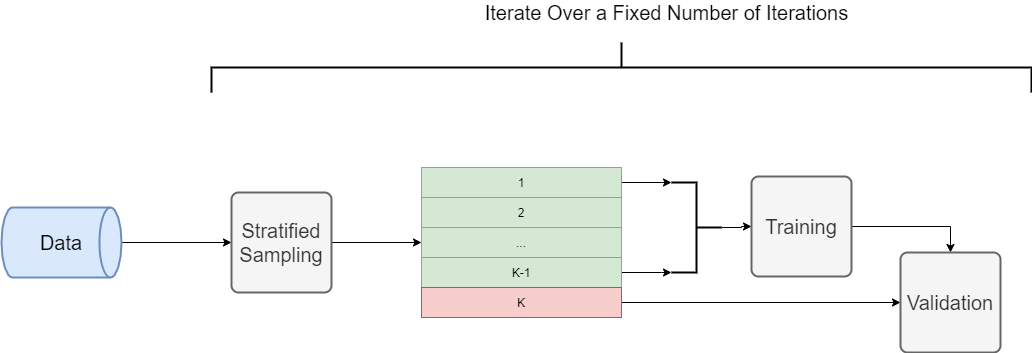

In [44]:
Image(filename='../image/cv/stratified k-fold cv.png', width=width, height=height)

In [45]:
from sklearn.model_selection import StratifiedKFold

logs=[]

skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=None)

bins=np.histogram_bin_edges(y,bins='sturges')

y_binned=np.digitize(y, bins)

for train_index, test_index in skf.split(X,y_binned):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_pred=sgd.fit(X_train, y_train).predict(X_test)
    
    logs.append(mean_squared_error(y_test, y_pred))

print(logs)

[2.7163141380303784e+28, 5.193576024446263e+27, 4.7078812626172375e+26, 2.4951585089856245e+28, 4.986875565271873e+27, 1.4581791712351916e+28, 1.7498186854751438e+28, 1.516389952431595e+28, 3.6575936002509704e+28, 1.9598400812086643e+28]


### 3. Leave-One-Out Cross Validation
- This CV technique trains on all samples except one. 
- It is a K-Fold CV where K = N where N is the number of samples in the data.

Since training on N different possible combinations of the data is costly in terms of compute power for training & validating the model, this CV Technique is preferable when working with small datasets.

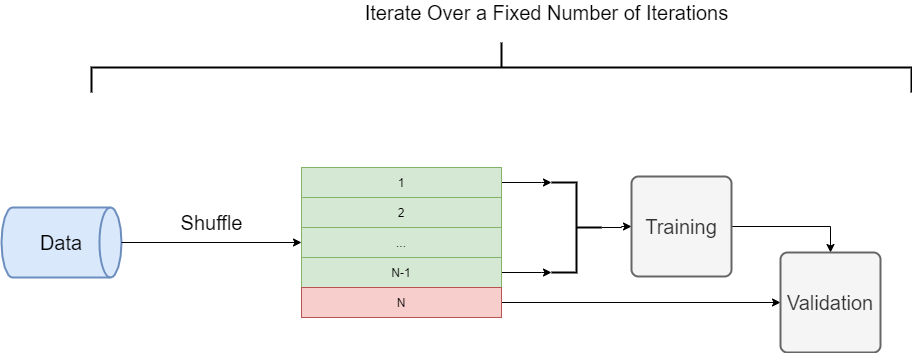

In [46]:
Image(filename='../image/cv/leaveoneout cv.png', width=width, height=height)

In [47]:
from sklearn.model_selection import LeaveOneOut

logs=[]

leaveCV=LeaveOneOut()

for train_index, test_index in leaveCV.split(X):

    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_pred=sgd.fit(X_train, y_train).predict(X_test)
    
    logs.append(mean_squared_error(y_test, y_pred))
    
print(logs)

[2.207760244355663e+28, 5.827515213171895e+27, 8.164053283717114e+27, 3.97807274412302e+28, 3.676611629317832e+26, 5.596595056431759e+27, 4.899721998259936e+24, 1.7397916761053167e+28, 3.7557686299187157e+28, 1.5162040536399447e+26, 1.1555536102921074e+28, 1.9082852582106607e+28, 1.6463664465449226e+26, 8.03625008900009e+27, 7.586935210626766e+25, 1.542661174131985e+27, 3.6428246793737297e+28, 2.1246113548007633e+28, 3.983674021792509e+28, 3.201548229160521e+26, 4.065226647575944e+28, 4.4129477197450874e+27, 1.639214878236191e+28, 1.597879121878897e+27, 1.6006054615413818e+28, 4.200305923071637e+27, 9.405566525377725e+27, 1.2007659625790647e+28, 1.8488519800583924e+27, 5.805166836197836e+27, 1.3953628607993438e+28, 3.566120962682276e+26, 3.028669851998422e+27, 8.642145234961921e+26, 1.6419635729911287e+27, 9.344775950168418e+27, 1.0473036983296205e+28, 2.1477150793620384e+27, 2.927443546570926e+28, 1.9704247904503288e+28, 8.35938181528633e+27, 1.2121491357946673e+28, 3.837487461110628e

### 4. Group K-Fold Cross Validation 
- A CV Technique that creates train and test groups such that the same group does not appear in two different folds and the number of distinct groups is the same in each fold.

Therefore, Group K-Fold CV is commonly used with large datasets in adjuncture with Stratified Sampling.

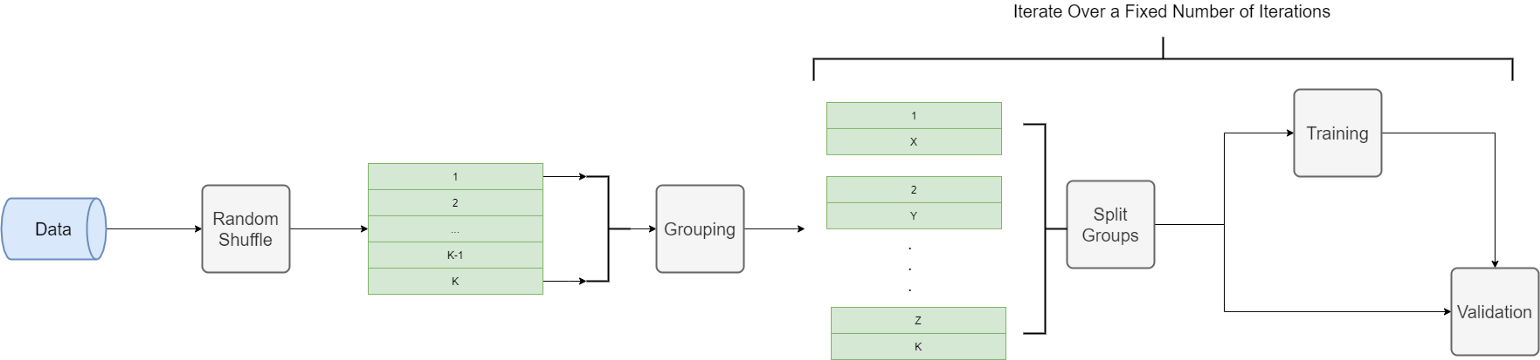

In [48]:
Image(filename='../image/cv/group k-fold cv.png', width=1200, height=1000)

In [49]:
from sklearn.model_selection import GroupKFold

logs=[]
bins=np.histogram_bin_edges(y,bins='sturges')
groups=np.digitize(y, bins)

gkf=GroupKFold(n_splits=len(bins))

for train_index, test_index in gkf.split(X,y, groups):
    lr=LinearRegression()
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    y_pred=sgd.fit(X_train, y_train).predict(X_test)
    
    logs.append(mean_squared_error(y_test, y_pred))
print(logs)

[2.4343224946886773e+28, 4.1700690266847584e+27, 1.7277462774639092e+28, 4.78225053969067e+27, 2.748077922480775e+28, 5.203929638294488e+26, 8.478278592606604e+27, 6.91971841189712e+28, 4.397703916407548e+26, 8.681765141882687e+26, 1.5521020404351248e+27]


### 5. Hold-Out Based Cross Validation : 
- A CV Technique which is different from other CV Techniques where the data is split into two sets, rather than K-Folds :-
   * a. Train Set : The model is trained on this dataset.
   * b. Hold-Out Set : The model is validated on this dataset. This dataset must mantain the ratio of labels as constant.
   
   
This CV Technique is commonly used when working with large datasets since it’ll be computationally intensive for aforementioned CV Techniques.

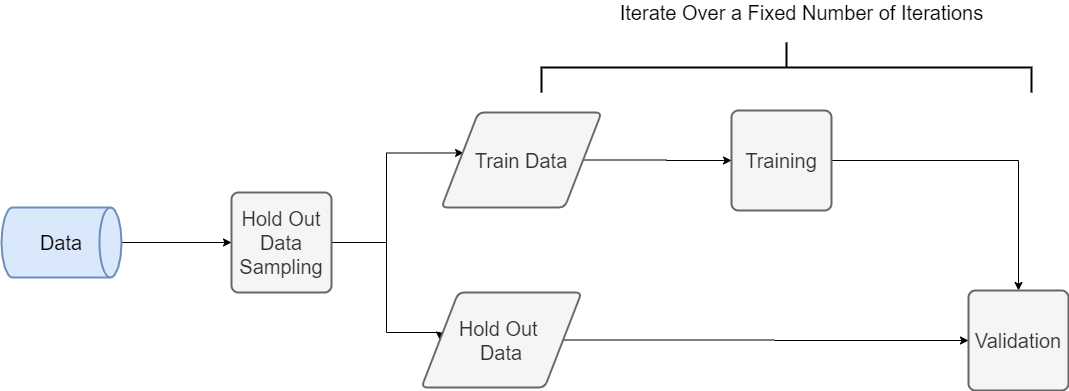

In [50]:
Image(filename='../image/cv/holdout cv.png', width=1200, height=1000)

In [51]:
from sklearn.model_selection import StratifiedKFold
import itertools
logs=[]

skf=StratifiedKFold(n_splits=10, shuffle=True, random_state=None)
bins=np.histogram_bin_edges(y,bins='sturges')
y_binned=np.digitize(y, bins)
train_indices=[]
test_indices=[]

for train_index, test_index in skf.split(X,y_binned):
    train_indices.append(train_index.tolist())
    test_indices.append(test_index.tolist())

test_index=test_indices[0]
X_test=X[test_index]
y_test=y[test_index]
indices=test_indices[1:]+train_indices
indices=list(itertools.chain(*indices))

y_pred=sgd.fit(X_train, y_train).predict(X_test)

logs.append(mean_squared_error(y_test, y_pred))

print(logs)

[4.329821382227741e+28]


# End